In [3]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [4]:
# Path to the dataset_json folder
folder_path = "C:\\Users\\DELL\\Desktop\\Pulchowk\\Major_Project\\ChordClassification\\ChordDatasets\\dataset_json"

# Initialize lists for features and labels
X, y = [], []

# # Loop through all JSON files in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(".json"):  # Ensure it's a JSON file
#         file_path = os.path.join(folder_path, filename)
        
#         # Read the JSON file
#         with open(file_path, "r") as f:
#             data = json.load(f)
#             X.extend(data['pitch'])  # Append pitch data
#             y.extend(data['labels'])  # Append labels

# Ensure pitch and labels align
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):  
        file_path = os.path.join(folder_path, filename)
        
        with open(file_path, "r") as f:
            data = json.load(f)

            if len(data['pitch']) == 1 and len(data['labels']) == 1:  
                X.append(data['pitch'][0])  # Store single pitch sample
                y.append(np.argmax(data['labels'][0]))  # Convert one-hot to class index
            else:
                print(f"Skipping {filename}: Pitch({len(data['pitch'])}) != Label({len(data['labels'])})")

X = np.array(X)
y = np.array(y)


In [5]:
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y).flatten()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (5840, 12), y shape: (5840,)


In [7]:
# Train SVM model
svm_model = SVC(kernel='linear')  # You can change the kernel type
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 94.52%


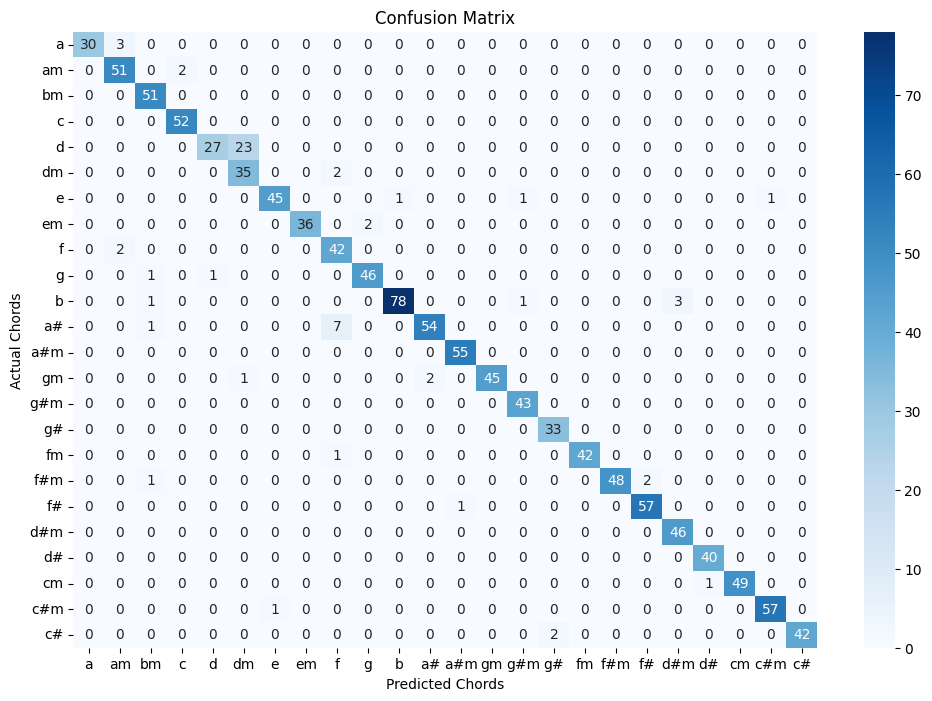

In [ ]:
# Create confusion matrix
labels = ['a', 'am', 'bm', 'c', 'd', 'dm', 'e', 'em', 'f', 'g', 'b', 'a#', 'a#m', 'gm', 'g#m', 'g#', 'fm', 'f#m', 'f#', 'd#m', 'd#', 'cm', 'c#m', 'c#']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Chords')
plt.ylabel('Actual Chords')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Save the trained model
import joblib
joblib.dump(svm_model, 'svm_music_classifier_24.pkl')

# Load the model later for inference
# svm_model = joblib.load('svm_music_classifier.pkl')

['svm_music_classifier_24.pkl']